In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("Cleaned_Data.csv")

In [3]:
X = df["Clean_text"]

In [4]:
y = df["target"]
y.value_counts()

target
0    4314
1    3265
Name: count, dtype: int64

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=10)

In [6]:
vectorizer = CountVectorizer(max_features=2000)
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [7]:
svm = SVC(kernel='linear')  
svm.fit(X_train_counts, y_train)

SVC(kernel='linear')

In [8]:
y_pred = svm.predict(X_test_counts)

print("Accuracy on training data")
print(svm.score(X_train_counts,y_train))

print("Accuracy on testing data")
print(svm.score(X_test_counts,y_test))


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Accuracy on training data
0.8857938718662952
Accuracy on testing data
0.7955145118733509
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       427
           1       0.78      0.74      0.76       331

    accuracy                           0.80       758
   macro avg       0.79      0.79      0.79       758
weighted avg       0.79      0.80      0.79       758



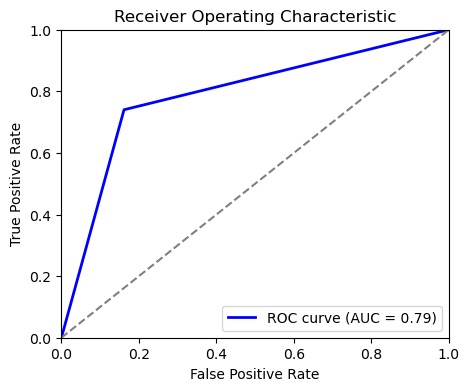

In [9]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()